Copyright (c) Microsoft Corporation.

Licensed under the MIT License.

# Generate Sythetic SEGY files for testing

This notebook builds the test data used by the convert_segy unit tests. It covers just a few of the SEG-Y files that could be encountered if you bring your own SEG-Y files for training. This is not a comprehensive set of files so there still may be situations where the segyio or the convert_segy.py utility would fail to load the SEG-Y data.

In [1]:
import utils.create_segy as utils
import segyio

## Create sample SEG-Y files for testing

1. Control, that represents a perfect data, with no missing traces.
2. Missing traces on the top-left and bottom right of the geographic field w/ inline sorting
3. Missing traces on the top-left and bottom right of the geographic field w/ crossline sorting
4. Missing trace in the center of the geographic field w/ inline sorting

### Control File

Create a file that has a cuboid shape with traces at all inline/crosslines

Written to ./normalsegy.segy
	inlines: 40
	crosslines: 200
	traces: 8000
Loaded from file ./normalsegy.segy
	Tracecount: 8000
	Data Shape: (8000, 91)
	Sample length: 10


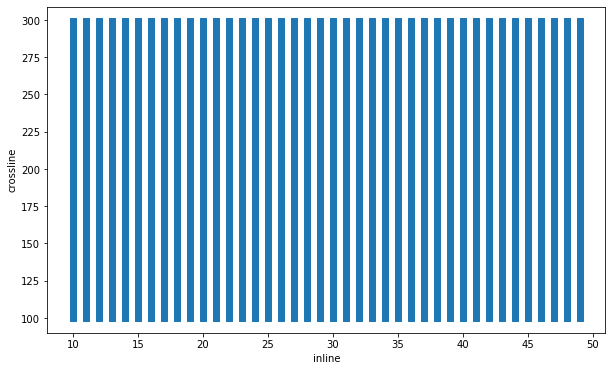

Loaded with geometry: ./normalsegy.segy :
	Num samples per trace: 10
	Num traces in file: 8000


In [2]:
controlfile = './normalsegy.segy'
utils.create_segy_file(lambda il, xl: True, controlfile)
utils.get_segy_details(controlfile)
utils.load_segy_with_geometry(controlfile)

### Inline Error File

inlineerror.segy will throw an error that inlines are not unique because it assumes the same number of inlines per crossline

Written to ./inlineerror.segy
	inlines: 40
	crosslines: 200
	traces: 7309
Loaded from file ./inlineerror.segy
	Tracecount: 7309
	Data Shape: (7309, 91)
	Sample length: 10


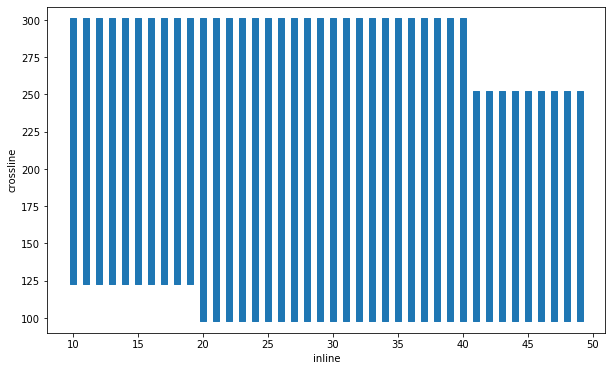

Load failed with geometry: ./inlineerror.segy :
Inlines inconsistent, expect all inlines to be unique


In [3]:
inlinefile = './inlineerror.segy'
utils.create_segy_file(lambda il, xl: not ((il < 20 and xl < 125) or (il > 40 and xl > 250)),
    inlinefile, segyio.TraceSortingFormat.INLINE_SORTING)
utils.get_segy_details(inlinefile)
utils.load_segy_with_geometry(inlinefile)

### Crossline Error File

xlineerror.segy will throw an error that crosslines are not unique because it assumes the same number of crosslines per inline

Written to ./xlineerror.segy
	inlines: 40
	crosslines: 200
	traces: 7309
Loaded from file ./xlineerror.segy
	Tracecount: 7309
	Data Shape: (7309, 91)
	Sample length: 10


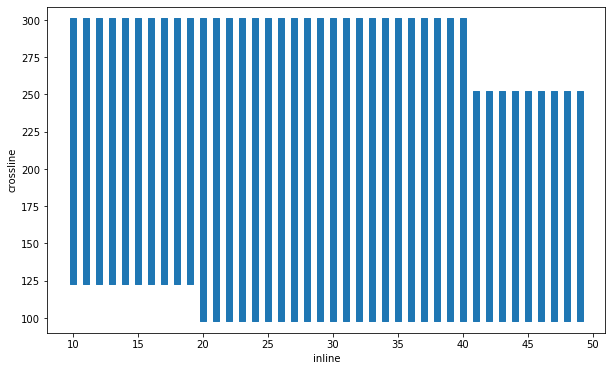

Load failed with geometry: ./xlineerror.segy :
Inlines inconsistent, expect all inlines to be unique


In [4]:
xlineerrorfile = './xlineerror.segy'
utils.create_segy_file(lambda il, xl: not ((il < 20 and xl < 125) or (il > 40 and xl > 250)),
    xlineerrorfile, segyio.TraceSortingFormat.CROSSLINE_SORTING)
utils.get_segy_details(xlineerrorfile)
utils.load_segy_with_geometry(xlineerrorfile)

### Donut whole SEG-Y file

When collecting seismic data, unless in an area of open ocean, it is  rare to be able to collect all trace data from a rectangular field make the collection of traces from a uniform field 


Written to ./donuthole.segy
	inlines: 40
	crosslines: 200
	traces: 7109
Loaded from file ./donuthole.segy
	Tracecount: 7109
	Data Shape: (7109, 91)
	Sample length: 10


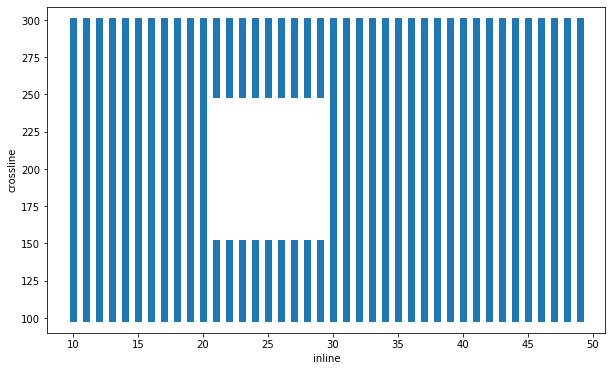

Load failed with geometry: ./donuthole.segy :
Invalid dimensions, ilines (35) * xlines (200) * offsets (1) should match the number of traces (7109)


In [5]:
donuthole_segyfile = './donuthole.segy'
utils.create_segy_file(lambda il, xl: not ((20 < il < 30) and (150 < xl < 250)),
    donuthole_segyfile, segyio.TraceSortingFormat.INLINE_SORTING)
utils.get_segy_details(donuthole_segyfile)
utils.load_segy_with_geometry(donuthole_segyfile)